### Using GnuplotRB in IRuby notebooks
GnuplotRB plots may be embedded into iRuby notebooks as images (terminals *svg*, *png*, *jpeg* and *pngcairo* are supported) or plain text (*dumb* terminal). By default GnuplotRB will use svg:

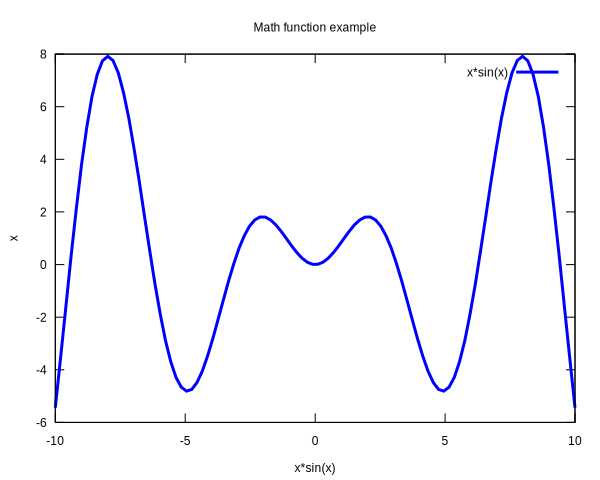

In [1]:
require 'gnuplotrb'
include GnuplotRB

simple_plot = Plot.new(
  ['x*sin(x)', with: 'lines', lt: { rgb: 'blue', lw: 3 }],
  xrange: -10..10,
  title: 'Math function example', 
  ylabel: 'x',
  xlabel: 'x*sin(x)'
)

You can make GnuplotRB plots to be rendered into other formats using *term* option:

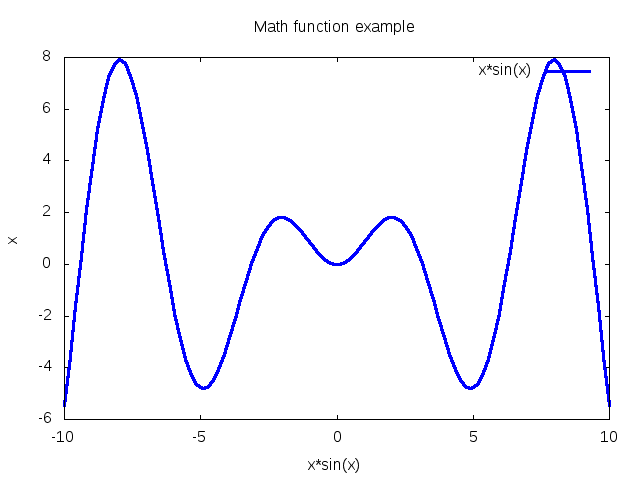

In [2]:
simple_plot.term('png')

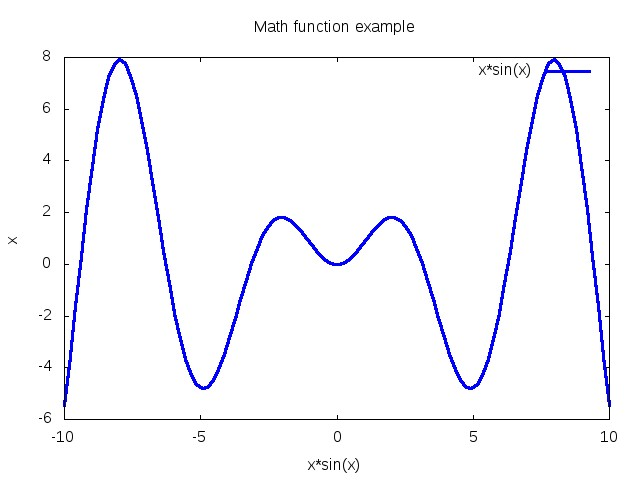

In [3]:
simple_plot.term('jpeg')

In [4]:
simple_plot.term('dumb')


                             Math function example

  8 +-+---------------+-----------------+----------------+---------------+-+
    +     +  +        +                 +                +        +  +     +
  6 +-+  +   +                                            x*sin(x)++-----+-+
    |   +     +                                                  +     +   |
    |   |      +                                                +      |   |
  4 +-+ +      |                                                |      + +-+
    |   |      +                                                +       |  |
  2 +-++        +                                              +        ++-+
    |  |         |            ++++++        ++++++             |         | |
    | +          +           +      +++  +++      +           +          + |
  0 +-+           |         +         ++++         +          |          +-+
    ||            +        +                        +        +            ||
 -2 +-+           +   

#### Using terminal options
To specify some image params like canvas size or font you can pass options to term:

In [5]:
simple_plot.term('dumb', size: [60,30])


                    Math function example

  8 +-+----------+------------+------------+----------+-+
    +   + +      +            +            +      + +   +
    |   |  +                           x*sin(x) +-----+ |
  6 +-+ +  |                                     |  + +-+
    |   |  +                                     +   |  |
    |  +    |                                    |   +  |
    |  |    +                                   +    |  |
  4 +-++    |                                   |    ++-+
    |  |    +                                   +    |  |
    | |      |                                  |     | |
  2 +-+      +          +++       +++          +      +-+
    | |      |         +  ++     ++  +         |      | |
    | |      +        +    ++   ++    +        +      | |
  0 +-+       |       +      +++      +        |      +-+
    | |       +      +                 +      +       | |
    ||         |     +                 +      |        ||
 -2 +-+        +     |     

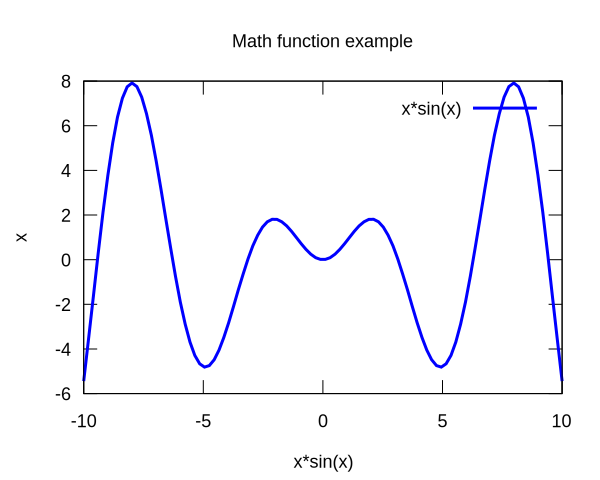

In [6]:
simple_plot.term('svg', fsize: '18')

Of course plot may be created with *term* option already set:

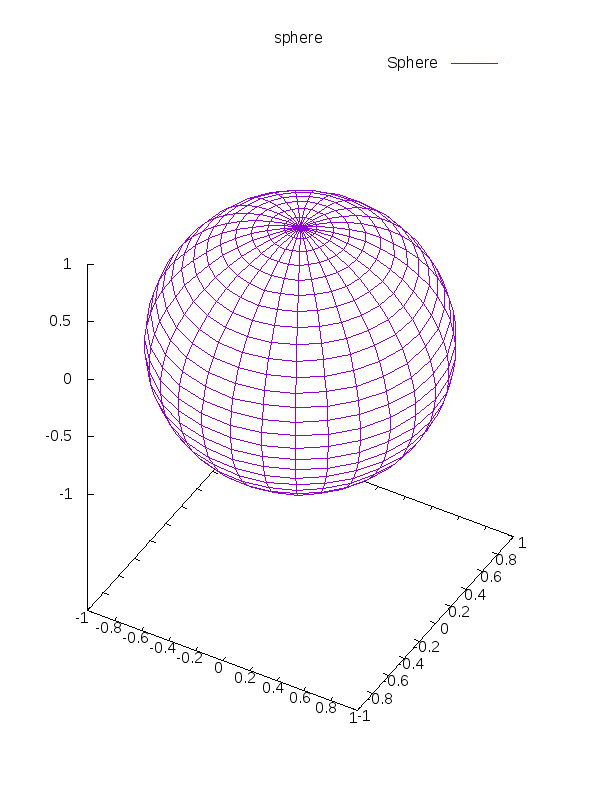

In [7]:
Splot.new(
  ['sin(u)*cos(v), sin(u)*sin(v), cos(u)', title: 'Sphere'],
  parametric: true,
  urange: 0..Math::PI,
  vrange: 0..2*Math::PI,
  title: 'sphere',
  hidden3d: true,
  isosamples: 30,
  term: ['png', size: [600, 800]]
)

## Plotting to image file

GnuplotRB allows to plot into png/svg/jpeg/gif files with handy ```#to_|format name|``` methods. They take 2 arguments: path to image file (optional, if none given, file contents will be returned from method) and options. This kind of methods are available for all Plottable objects except Animation (Dataset, Plot, Splot, Multiplot). You may see all possible formats in [gnuplot doc](http://www.gnuplot.info/docs_5.0/gnuplot.pdf) p. 190. You can also check which terminals are handled by your gnuplot installation:

In [8]:
Settings.available_terminals

["cairolatex", "canvas", "cgm", "context", "corel", "dumb", "dxf", "eepic", "emf", "emtex", "epscairo", "epslatex", "fig", "gif", "hpgl", "jpeg", "latex", "lua", "mf", "mp", "pcl5", "pdfcairo", "png", "pngcairo", "postscript", "pslatex", "pstex", "pstricks", "qms", "qt", "svg", "tek40xx", "tek410x", "texdraw", "tgif", "tikz", "tkcanvas", "tpic", "unknown", "vttek", "x11", "xlib", "xterm"]

### Examples

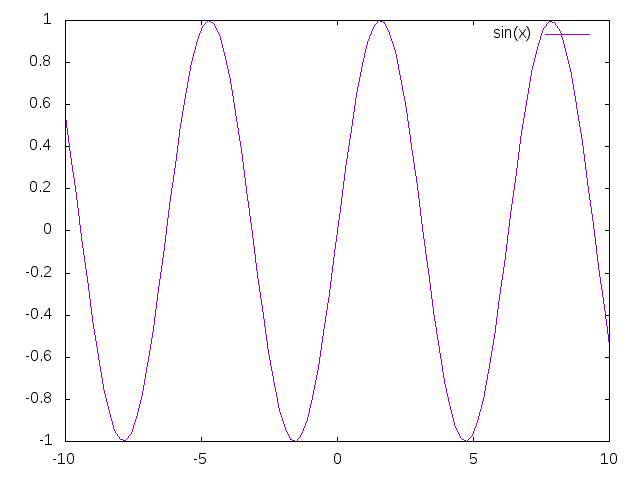

In [9]:
Plot.new('sin(x)').to_png('plot.png')
File.open('plot.png')

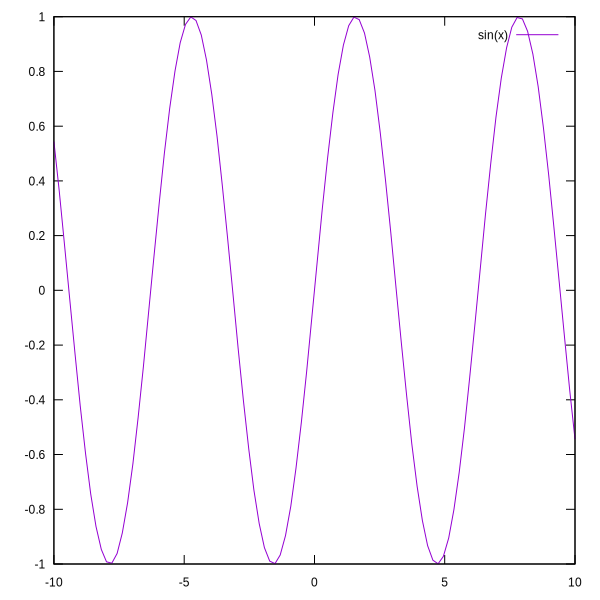

In [10]:
svg_contents = Plot.new('sin(x)').to_svg(size: [600, 600])
IRuby.display(svg_contents, mime: 'image/svg+xml')